# Data Analysis Codes

In [1]:
### Final Data Ready for Propensity Score Matching:   "/work/campers_ipv_for_analysis_corrected.csv"

ipv3 <- read.csv("campers_ipv_for_analysis_corrected_match.csv")

colnames(ipv3)
table(ipv3$Husb.Employment.Bin)
table(ipv3$Employment.Bin)


[1] "X.1"                 "X"                   "RespondentID"       
 [4] "Year"                "Age"                 "Region"             
 [7] "Educ.Level"          "Educ.Years"          "Educ.Attained"      
[10] "Marital"             "Husb.Educ.Level"     "Husb.Educ.Years"    
[13] "Husb.Employment"     "Employment"          "Husb.Educ.Attained" 
[16] "Husb.Age"            "Emotional.IPV"       "Less.Physic.IPV"    
[19] "More.Physic.IPV"     "Sexual.IPV"          "Husb.Employment.Bin"
[22] "Employment.Bin"      "LPG"                 "Physical.IPV"       
[25] "ANY.IPV"             "Counts.IPV"          "Male"               
[28] "Female"


   0    1 
  84 4142 


   0    1 
2466 1760 

## Matching

Path # 1 - Treatment = Male

In [2]:
install.packages(c("Matching","rgenoud","MatchIt"))
library(MatchIt)
m.out <- matchit(
  Male ~ Age + Age^2 + Region + Marital + Husb.Educ.Level,
  data = ipv3,
  method = "cem",
  distance = "glm")

Installing packages into ‘/work/.R/library’
(as ‘lib’ is unspecified)

Warning message in install.packages(c("Matching", "rgenoud", "MatchIt")):
“installation of package ‘Matching’ had non-zero exit status”
Warning message in install.packages(c("Matching", "rgenoud", "MatchIt")):
“installation of package ‘rgenoud’ had non-zero exit status”
Warning message in install.packages(c("Matching", "rgenoud", "MatchIt")):
“installation of package ‘MatchIt’ had non-zero exit status”


In [3]:
install.packages(c("Matching","rgenoud","MatchIt"))
library(MatchIt)
m.out.2 <- matchit(
  Husb.Employment.Bin ~ Age + Age^2 + Educ.Level + Region + Marital  + Husb.Educ.Level,
  data = ipv3,
  method = "cem",
  distance = "glm",
  link = "logit",
  ratio=1)

summary(m.out.2)
ipv_match.2 <- match.data(m.out.2)
ipv_match.2

Installing packages into ‘/work/.R/library’
(as ‘lib’ is unspecified)

Warning message in install.packages(c("Matching", "rgenoud", "MatchIt")):
“installation of package ‘Matching’ had non-zero exit status”
Warning message in install.packages(c("Matching", "rgenoud", "MatchIt")):
“installation of package ‘rgenoud’ had non-zero exit status”
Warning message in install.packages(c("Matching", "rgenoud", "MatchIt")):
“installation of package ‘MatchIt’ had non-zero exit status”



Call:
matchit(formula = Husb.Employment.Bin ~ Age + Age^2 + Educ.Level + 
    Region + Marital + Husb.Educ.Level, data = ipv3, method = "cem", 
    distance = "glm", link = "logit", ratio = 1)

Summary of Balance for All Data:
                Means Treated Means Control Std. Mean Diff. Var. Ratio
Age                   29.5210       28.7857          0.1131     0.8323
Educ.Level             2.0249        2.3690         -0.4586     1.0261
Region                 9.3740        8.3571          0.2150     0.8408
Marital                1.3392        1.4405         -0.2139     0.8989
Husb.Educ.Level        1.8839        2.2619         -0.4772     1.0370
                eCDF Mean eCDF Max
Age                0.0321   0.1467
Educ.Level         0.0884   0.2248
Region             0.0609   0.1341
Marital            0.0506   0.1013
Husb.Educ.Level    0.0951   0.2007

Summary of Balance for Matched Data:
                Means Treated Means Control Std. Mean Diff. Var. Ratio
Age                   28.75

,X.1,X,RespondentID,Year,Age,Region,Educ.Level,Educ.Years,Educ.Attained,Marital,...,Husb.Employment.Bin,Employment.Bin,LPG,Physical.IPV,ANY.IPV,Counts.IPV,Male,Female,weights,subclass
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<dbl>,<fct>
4,4,9229,9725,2017,23,15,3,12,5,1,...,1,0,Male only Employed,0,0,0,1,0,1.0000000,6
8,8,9233,9729,2017,37,15,1,2,1,1,...,1,1,Both employed,0,0,0,1,1,1.0000000,4
10,10,9235,9731,2017,23,15,2,10,3,1,...,1,0,Male only Employed,0,0,0,1,0,1.0000000,5
17,17,9246,9742,2017,36,15,1,5,1,1,...,1,0,Male only Employed,0,0,0,1,0,1.0000000,4
30,30,9260,9757,2017,35,15,1,7,2,1,...,1,0,Male only Employed,0,0,0,1,0,1.0000000,4
39,39,9269,9766,2017,21,15,3,13,5,1,...,1,0,Male only Employed,0,0,0,1,0,1.0000000,6
41,41,9271,9768,2017,23,15,2,9,3,1,...,1,0,Male only Employed,0,0,0,1,0,1.0000000,5
49,49,9280,9778,2017,25,15,3,13,5,1,...,0,0,Both unemployed,0,0,0,0,0,1.2116041,1
50,50,9281,9779,2017,25,15,3,13,5,1,...,1,0,Male only Employed,0,0,0,1,0,1.0000000,1


In [4]:
m.out.3 <- matchit(
  Employment.Bin ~ Age + Age^2 + Educ.Level + Region + Marital + Husb.Educ.Level,
  data = ipv_match.2,
  method = "cem",
  distance = "glm",
  link = "logit",
  ratio=1)

ipv_match.3 <- match.data(m.out.3,  weights = "wts", subclass = "sub2")
summary(m.out.3)
ipv_match.3


Call:
matchit(formula = Employment.Bin ~ Age + Age^2 + Educ.Level + 
    Region + Marital + Husb.Educ.Level, data = ipv_match.2, method = "cem", 
    distance = "glm", link = "logit", ratio = 1)

Summary of Balance for All Data:
                Means Treated Means Control Std. Mean Diff. Var. Ratio
Age                   30.4785       27.2687          0.5029     1.1949
Educ.Level             2.5153        2.3632          0.2336     1.0539
Region                 7.9387        8.8806         -0.1780     1.0291
Marital                1.3129        1.4279         -0.2472     0.8793
Husb.Educ.Level        2.3865        2.2687          0.1630     1.0504
                eCDF Mean eCDF Max
Age                0.1176   0.2187
Educ.Level         0.0386   0.1523
Region             0.0631   0.1220
Marital            0.0575   0.1150
Husb.Educ.Level    0.0300   0.1085

Summary of Balance for Matched Data:
                Means Treated Means Control Std. Mean Diff. Var. Ratio
Age                   30.

,X.1,X,RespondentID,Year,Age,Region,Educ.Level,Educ.Years,Educ.Attained,Marital,...,LPG,Physical.IPV,ANY.IPV,Counts.IPV,Male,Female,weights,subclass,wts,sub2
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<chr>,<int>,<int>,<int>,<int>,<int>,<dbl>,<fct>,<dbl>,<fct>
8,8,9233,9729,2017,37,15,1,2,1,1,...,Both employed,0,0,0,1,1,1.0000000,4,1.0000000,8
10,10,9235,9731,2017,23,15,2,10,3,1,...,Male only Employed,0,0,0,1,0,1.0000000,5,0.4861538,1
17,17,9246,9742,2017,36,15,1,5,1,1,...,Male only Employed,0,0,0,1,0,1.0000000,4,0.2025641,2
30,30,9260,9757,2017,35,15,1,7,2,1,...,Male only Employed,0,0,0,1,0,1.0000000,4,0.2025641,2
41,41,9271,9768,2017,23,15,2,9,3,1,...,Male only Employed,0,0,0,1,0,1.0000000,5,0.4861538,1
49,49,9280,9778,2017,25,15,3,13,5,1,...,Both unemployed,0,0,0,0,0,1.2116041,1,0.2430769,3
50,50,9281,9779,2017,25,15,3,13,5,1,...,Male only Employed,0,0,0,1,0,1.0000000,1,0.2430769,3
51,51,9282,9780,2017,27,15,2,11,4,1,...,Both unemployed,0,0,0,0,0,0.2423208,2,1.2153846,4
56,56,9287,9785,2017,36,15,1,6,1,1,...,Male only Employed,0,0,0,1,0,1.0000000,4,0.2025641,2


In [5]:
m.out.4 <- matchit(
  Employment.Bin ~ Age + Age^2 + Educ.Level + Region + Marital + Husb.Educ.Level,
  data = ipv3,
  method = "cem",
  distance = "glm",
  link = "logit",
  ratio=1)

summary(m.out.4)
ipv_match.4 <- match.data(m.out.4)
ipv_match.4


Call:
matchit(formula = Employment.Bin ~ Age + Age^2 + Educ.Level + 
    Region + Marital + Husb.Educ.Level, data = ipv3, method = "cem", 
    distance = "glm", link = "logit", ratio = 1)

Summary of Balance for All Data:
                Means Treated Means Control Std. Mean Diff. Var. Ratio
Age                   30.8778       28.5276          0.3635     1.0297
Educ.Level             2.1716        1.9319          0.3157     1.0812
Region                 9.2903        9.3990         -0.0228     1.0181
Marital                1.3193        1.3569         -0.0805     0.9472
Husb.Educ.Level        1.9937        1.8183          0.2180     1.0707
                eCDF Mean eCDF Max
Age                0.0692   0.1597
Educ.Level         0.0599   0.1585
Region             0.0142   0.0433
Marital            0.0188   0.0375
Husb.Educ.Level    0.0439   0.0964

Summary of Balance for Matched Data:
                Means Treated Means Control Std. Mean Diff. Var. Ratio
Age                   29.8834   

,X.1,X,RespondentID,Year,Age,Region,Educ.Level,Educ.Years,Educ.Attained,Marital,...,Husb.Employment.Bin,Employment.Bin,LPG,Physical.IPV,ANY.IPV,Counts.IPV,Male,Female,weights,subclass
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<dbl>,<fct>
1,1,9224,9719,2017,30,15,2,8,3,1,...,1,0,Male only Employed,0,0,0,1,0,0.46773522,1
5,5,9230,9726,2017,30,15,1,7,2,1,...,1,1,Both employed,0,1,1,1,1,1.00000000,38
6,6,9231,9727,2017,19,15,2,9,3,1,...,1,1,Both employed,0,1,1,1,1,1.00000000,46
8,8,9233,9729,2017,37,15,1,2,1,1,...,1,1,Both employed,0,0,0,1,1,1.00000000,7
10,10,9235,9731,2017,23,15,2,10,3,1,...,1,0,Male only Employed,0,0,0,1,0,0.31182348,2
11,11,9236,9732,2017,24,15,1,7,2,1,...,1,0,Male only Employed,0,0,0,1,0,0.09594569,3
13,13,9238,9734,2017,27,15,3,15,5,1,...,1,0,Male only Employed,0,0,0,1,0,0.35636969,4
14,14,9241,9737,2017,20,15,2,10,3,1,...,1,0,Male only Employed,0,0,0,1,0,0.41576464,5
15,15,9243,9739,2017,27,15,2,11,4,1,...,1,0,Male only Employed,0,0,0,1,0,0.46773522,6


In [6]:
m.out.5 <- matchit(
  Husb.Employment.Bin ~ Age + Age^2 + Educ.Level + Region + Marital + Husb.Educ.Level,
  data = ipv_match.4,
  method = "cem",
  distance = "glm",
  link = "logit",
  ratio=1)

ipv_match.5 <- match.data(m.out.5,  weights = "wts", subclass = "sub2")
summary(m.out.5)
ipv_match.5


Call:
matchit(formula = Husb.Employment.Bin ~ Age + Age^2 + Educ.Level + 
    Region + Marital + Husb.Educ.Level, data = ipv_match.4, method = "cem", 
    distance = "glm", link = "logit", ratio = 1)

Summary of Balance for All Data:
                Means Treated Means Control Std. Mean Diff. Var. Ratio
Age                   29.1486       28.9636          0.0318     0.8643
Educ.Level             2.0991        2.4182         -0.4716     0.9740
Region                 9.4928        8.4909          0.2093     0.7965
Marital                1.2927        1.4000         -0.2357     0.8473
Husb.Educ.Level        1.9531        2.2545         -0.4130     0.8870
                eCDF Mean eCDF Max
Age                0.0262   0.1016
Educ.Level         0.0874   0.2288
Region             0.0617   0.1495
Marital            0.0536   0.1073
Husb.Educ.Level    0.0822   0.1970

Summary of Balance for Matched Data:
                Means Treated Means Control Std. Mean Diff. Var. Ratio
Age                 

,X.1,X,RespondentID,Year,Age,Region,Educ.Level,Educ.Years,Educ.Attained,Marital,...,LPG,Physical.IPV,ANY.IPV,Counts.IPV,Male,Female,weights,subclass,wts,sub2
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<chr>,<int>,<int>,<int>,<int>,<int>,<dbl>,<fct>,<dbl>,<fct>
14,14,9241,9737,2017,20,15,2,10,3,1,...,Male only Employed,0,0,0,1,0,0.4157646,5,1.0000000,5
17,17,9246,9742,2017,36,15,1,5,1,1,...,Male only Employed,0,0,0,1,0,0.5345545,7,1.0000000,4
30,30,9260,9757,2017,35,15,1,7,2,1,...,Male only Employed,0,0,0,1,0,0.5345545,7,1.0000000,4
49,49,9280,9778,2017,25,15,3,13,5,1,...,Both unemployed,0,0,0,0,0,0.2494588,16,1.0843373,1
50,50,9281,9779,2017,25,15,3,13,5,1,...,Male only Employed,0,0,0,1,0,0.2494588,16,1.0000000,1
51,51,9282,9780,2017,27,15,2,11,4,1,...,Both unemployed,0,0,0,0,0,1.2472939,17,0.4337349,2
56,56,9287,9785,2017,36,15,1,6,1,1,...,Male only Employed,0,0,0,1,0,0.5345545,7,1.0000000,4
61,61,9292,9790,2017,35,15,1,2,1,1,...,Male only Employed,0,0,0,1,0,0.5345545,7,1.0000000,4
80,80,9314,9815,2017,25,9,3,14,5,1,...,Male only Employed,0,0,0,1,0,0.4157646,25,1.0000000,3


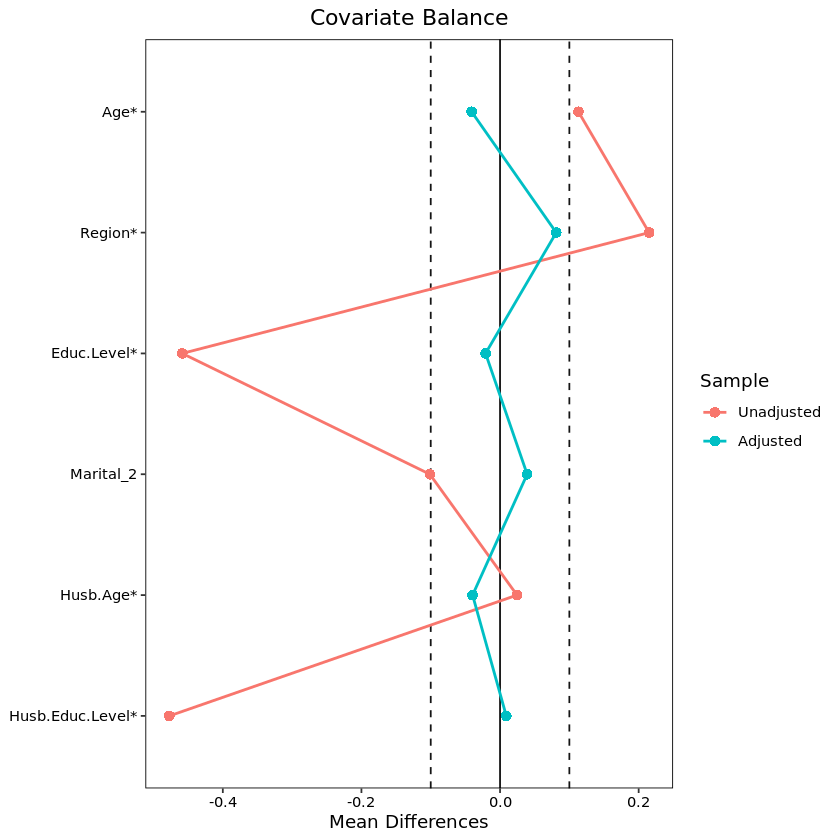

In [7]:
model1 <- glm(Husb.Employment.Bin ~ Age + Region + Educ.Level + Marital + Husb.Age + Husb.Educ.Level,
    family=binomial, data=ipv3)

X <- model1$fitted
Y <- ipv3$Counts.IPV
Tr <- ipv3$Male

effect <- Matching::Match(Y=Y, Tr=Tr, X=X, M=1)

balance.table1 <- cobalt::bal.tab(effect,
    Male ~ Age + Region + Educ.Level + Marital + Husb.Age + Husb.Educ.Level,
    data = ipv3, un = TRUE, quick = FALSE, stats=NULL, int=FALSE, poly=1) 

cobalt::love.plot(balance.table1, 
          threshold =.1,
          line = TRUE,
          stars = "std")

In [8]:
summary(m.out.2,un=FALSE)



Call:
matchit(formula = Husb.Employment.Bin ~ Age + Age^2 + Educ.Level + 
    Region + Marital + Husb.Educ.Level, data = ipv3, method = "cem", 
    distance = "glm", link = "logit", ratio = 1)

Summary of Balance for Matched Data:
                Means Treated Means Control Std. Mean Diff. Var. Ratio
Age                   28.7509       28.7816         -0.0047     0.9551
Educ.Level             2.4334        2.4334          0.0000     0.9809
Region                 8.4505        8.4420          0.0018     0.9419
Marital                1.3652        1.3652          0.0000     0.9809
Husb.Educ.Level        2.3311        2.3311         -0.0000     0.9809
                eCDF Mean eCDF Max Std. Pair Dist.
Age                0.0059   0.0410          0.0941
Educ.Level         0.0000   0.0000          0.0000
Region             0.0059   0.0546          0.0410
Marital            0.0000   0.0000          0.0000
Husb.Educ.Level    0.0000   0.0000          0.0000

Sample Sizes:
              Control

In [9]:
ipv_match <- match.data(m.out)

summary(m.out, un = TRUE)


Call:
matchit(formula = Male ~ Age + Age^2 + Region + Marital + Husb.Educ.Level, 
    data = ipv3, method = "cem", distance = "glm")

Summary of Balance for All Data:
                Means Treated Means Control Std. Mean Diff. Var. Ratio
Age                   29.5210       28.7857          0.1131     0.8323
Region                 9.3740        8.3571          0.2150     0.8408
Marital                1.3392        1.4405         -0.2139     0.8989
Husb.Educ.Level        1.8839        2.2619         -0.4772     1.0370
                eCDF Mean eCDF Max
Age                0.0321   0.1467
Region             0.0609   0.1341
Marital            0.0506   0.1013
Husb.Educ.Level    0.0951   0.2007

Summary of Balance for Matched Data:
                Means Treated Means Control Std. Mean Diff. Var. Ratio
Age                   28.4050       28.5631         -0.0243     0.9695
Region                 8.9538        8.9485          0.0011     0.9543
Marital                1.3446        1.3446        

Balance Measures
                    Type Diff.Un Diff.Adj
Educ.Level      Distance -0.4586  -0.3645
Marital_1       Distance  0.2139   0.0000
Husb.Age        Distance  0.0244   0.0543
Age              Contin.  0.1131  -0.0243
Region           Contin.  0.2150   0.0011
Marital_2         Binary -0.1013   0.0000
Husb.Educ.Level  Contin. -0.4772   0.0000

Sample sizes
                     Control Treated
All                    84.      4142
Matched (ESS)          51.47     563
Matched (Unweighted)   80.       563
Unmatched               4.      3579

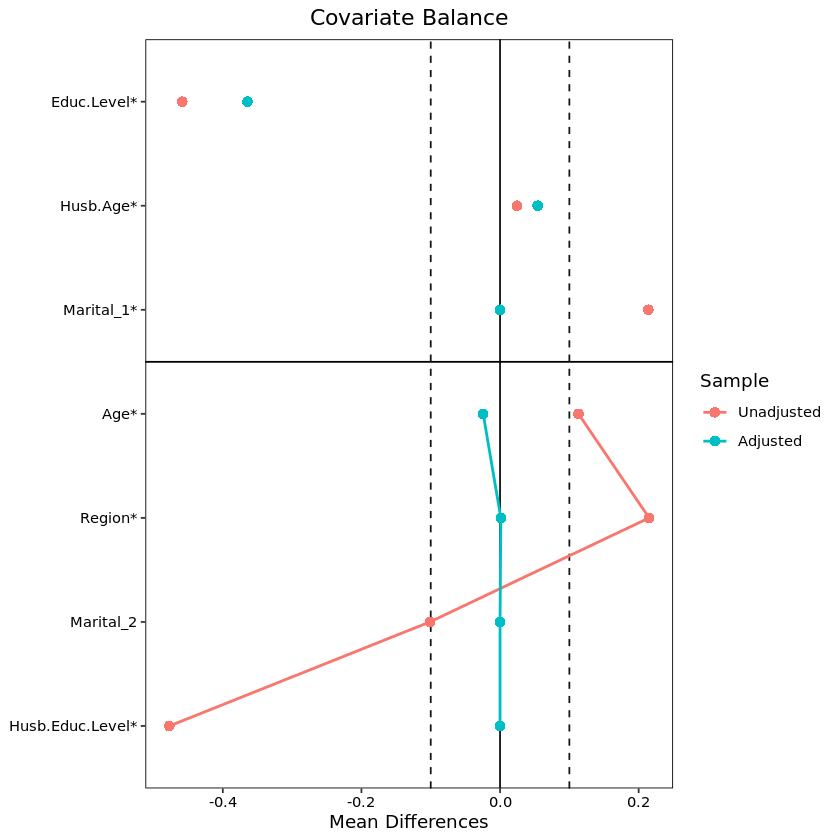

In [10]:
# install.packages("cobalt")
balance.table <- cobalt::bal.tab(m.out,
    Male ~ Age + Region + Educ.Level + Marital + Husb.Age + Husb.Educ.Level,
    data = ipv3, un = TRUE, quick = FALSE, stats=NULL, int=FALSE, poly=1)

balance.table

cobalt::love.plot(balance.table, 
          threshold =.1,
          line = TRUE,
          stars = "std")


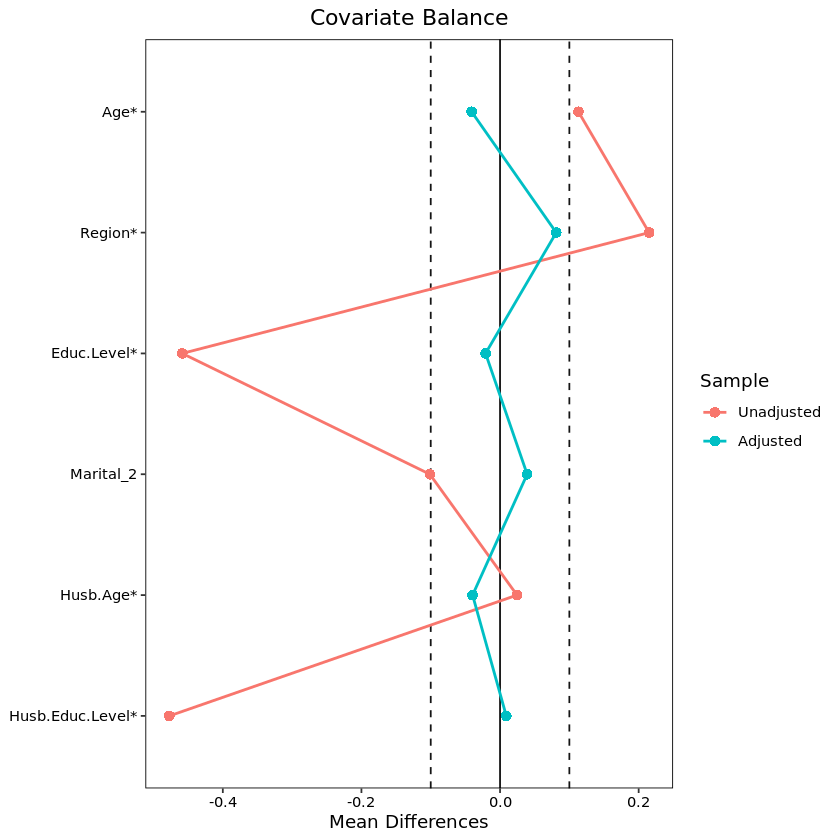

In [11]:
model <- glm(Male ~ Age + Region + Educ.Level + Marital + Husb.Age + Husb.Educ.Level, family=binomial, data=ipv3)

X <- model$fitted
Y <- ipv3$Counts.IPV
Tr <- ipv3$Male

effect <- Matching::Match(Y=Y, Tr=Tr, X=X, M=1)

balance.table1 <- cobalt::bal.tab(effect,
    Male ~ Age + Region + Educ.Level + Marital + Husb.Age + Husb.Educ.Level,
    data = ipv3, un = TRUE, quick = FALSE, stats=NULL, int=FALSE, poly=1) 

cobalt::love.plot(balance.table1, 
          threshold =.1,
          line = TRUE,
          stars = "std")


In [12]:
# ipv_match.3$Marital <- factor(ipv_match.3$Marital)
# ipv_match.3$Husb.Educ.Level <- factor(ipv_match.3$Husb.Educ.Level)
# ipv_match.3$Educ.Level <- factor(ipv_match.3$Educ.Level)
# ipv_match.3$Region <- factor(ipv_match.3$Region)
# ipv_match.3$Employment.Bin <- factor(ipv_match.3$Employment.Bin)
# ipv_match.3$Husb.Employment.Bin <- factor(ipv_match.3$Husb.Employment.Bin)

# ipv_match.5$Marital <- factor(ipv_match.5$Marital)
# ipv_match.5$Husb.Educ.Level <- factor(ipv_match.5$Husb.Educ.Level)
# ipv_match.5$Educ.Level <- factor(ipv_match.5$Educ.Level)
# ipv_match.5$Region <- factor(ipv_match.5$Region)
# ipv_match.5$Employment.Bin <- factor(ipv_match.5$Employment.Bin)
# ipv_match.5$Husb.Employment.Bin <- factor(ipv_match.5$Husb.Employment.Bin)

In [13]:
ipv.M.pois <- glm(Counts.IPV ~ Husb.Employment.Bin + Employment.Bin + (Husb.Employment.Bin * Employment.Bin) + Age + Age^2 + Educ.Level + Region + Marital + Husb.Educ.Level,family = poisson, weights = wts, data = ipv_match.3)
summary(ipv.M.pois)


Call:
glm(formula = Counts.IPV ~ Husb.Employment.Bin + Employment.Bin + 
    (Husb.Employment.Bin * Employment.Bin) + Age + Age^2 + Educ.Level + 
    Region + Marital + Husb.Educ.Level, family = poisson, data = ipv_match.3, 
    weights = wts)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.9753  -0.7786  -0.6156  -0.2938   3.3910  

Coefficients:
                                    Estimate Std. Error z value Pr(>|z|)    
(Intercept)                        -5.381067   1.445140  -3.724 0.000196 ***
Husb.Employment.Bin                 0.553590   0.608756   0.909 0.363149    
Employment.Bin                      1.257300   0.644807   1.950 0.051190 .  
Age                                 0.071729   0.025769   2.784 0.005377 ** 
Educ.Level                         -0.098454   0.342061  -0.288 0.773481    
Region                              0.005639   0.021265   0.265 0.790861    
Marital                             1.016345   0.325479   3.123 0.001793 ** 
Husb.Educ.

In [14]:
 ipv.M.pois.2 <- glm(Counts.IPV ~ Husb.Employment.Bin + Employment.Bin + (Husb.Employment.Bin * Employment.Bin) + Age + Age^2 + Educ.Level +Region + Marital + Husb.Educ.Level,family = poisson, weights = wts, data = ipv_match.5)
summary(ipv.M.pois.2)  


Call:
glm(formula = Counts.IPV ~ Husb.Employment.Bin + Employment.Bin + 
    (Husb.Employment.Bin * Employment.Bin) + Age + Age^2 + Educ.Level + 
    Region + Marital + Husb.Educ.Level, family = poisson, data = ipv_match.5, 
    weights = wts)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.9501  -0.7639  -0.6299  -0.4423   2.8136  

Coefficients:
                                   Estimate Std. Error z value Pr(>|z|)    
(Intercept)                        -5.02200    1.39749  -3.594 0.000326 ***
Husb.Employment.Bin                 0.55118    0.57900   0.952 0.341121    
Employment.Bin                      1.40562    0.60264   2.332 0.019677 *  
Age                                 0.06886    0.02752   2.502 0.012344 *  
Educ.Level                         -0.29355    0.38568  -0.761 0.446574    
Region                              0.01264    0.02118   0.597 0.550752    
Marital                             0.98965    0.33904   2.919 0.003512 ** 
Husb.Educ.Level   

In [15]:
# negative binomial
# install.packages("MASS")
# library(MASS)
ipv.M.nb <- glm.nb(Counts.IPV ~ Husb.Employment.Bin + Employment.Bin + Age + Region + Educ.Level + Marital + Husb.Age + Husb.Educ.Level, data = ipv_match.3)
summary(ipv.M.nb)

ipv.M.nb2 <- glm.nb(Counts.IPV ~ Husb.Employment.Bin + Employment.Bin + Age + Region + Educ.Level + Marital + Husb.Age + Husb.Educ.Level, data = ipv_match.5)
summary(ipv.M.nb2)


ERROR: Error in glm.nb(Counts.IPV ~ Husb.Employment.Bin + Employment.Bin + Age + : could not find function "glm.nb"


In [ ]:
### scratch
aggregate(ipv_match.3$Counts.IPV, list(ipv_match.3$Husb.Employment.Bin), FUN = mean)
aggregate(ipv_match.3$Counts.IPV, list(ipv_match.3$Employment.Bin), FUN = mean)

# mas mababa talaga IPV pag male employed (1); and mas mataas pag female emloyed (1)

Group.1,x
<int>,<dbl>
0,0.3157895
1,0.1470588


Group.1,x
<int>,<dbl>
0,0.1153846
1,0.2962963


In [ ]:
1111### scratch
# install.packages("pscl")
# library(pscl)
ipv.zinb <- zeroinfl(Counts.IPV ~ Husb.Employment.Bin + Employment.Bin + Age + Region + Educ.Level + Marital + Husb.Age + Husb.Educ.Level, weights = wts, link = "logit", dist = "negbin", data = ipv_match.3)
summary(ipv.zinb) # pangit

Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”



Call:
zeroinfl(formula = Counts.IPV ~ Husb.Employment.Bin + Employment.Bin + 
    Age + Region + Educ.Level + Marital + Husb.Age + Husb.Educ.Level, 
    data = ipv_match.3, weights = wts, dist = "negbin", link = "logit")

Pearson residuals:
       Min         1Q     Median         3Q        Max 
-4.906e-01 -3.286e-04 -2.002e-06 -1.490e-08  4.908e-01 

Count model coefficients (negbin with log link):
                    Estimate Std. Error z value Pr(>|z|)
(Intercept)          -29.955    144.010  -0.208    0.835
Husb.Employment.Bin  -20.484     93.493  -0.219    0.827
Employment.Bin        28.480    132.413   0.215    0.830
Age                    7.303     39.084   0.187    0.852
Region                 1.841      9.776   0.188    0.851
Educ.Level            -4.358     62.627  -0.070    0.945
Marital               17.684     84.032   0.210    0.833
Husb.Age              -7.316     39.100  -0.187    0.852
Husb.Educ.Level        4.208     62.525   0.067    0.946
Log(theta)            12.6

Dataset

In [ ]:
head(ipv_match)

,X.1,X,RespondentID,Year,Age,Region,Educ.Level,Educ.Years,Educ.Attained,Marital,...,Husb.Employment.Bin,Employment.Bin,LPG,Physical.IPV,ANY.IPV,Counts.IPV,Male,Female,weights,subclass
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<dbl>,<fct>
4,4,9229,9725,2017,23,15,3,12,5,1,...,1,0,Male only Employed,0,0,0,1,0,1.0000000,4
51,51,9282,9780,2017,27,15,2,11,4,1,...,0,0,Both unemployed,0,0,0,0,0,0.4803922,1
65,65,9296,9794,2017,26,15,2,9,3,1,...,1,1,Both employed,0,0,0,1,1,1.0000000,1
80,80,9314,9815,2017,25,9,3,14,5,1,...,1,0,Male only Employed,0,0,0,1,0,1.0000000,2
84,84,9318,9819,2017,35,9,3,15,5,1,...,1,0,Male only Employed,0,0,0,1,0,1.0000000,42
85,85,9319,9820,2017,25,9,3,15,5,1,...,0,1,Female only Employed,0,0,0,0,1,0.9607843,2


Reclassifying variables

In [ ]:
ipv$Marital <- factor(ipv$Marital)
ipv$Husb.Educ.Level <- factor(ipv$Husb.Educ.Level)
ipv$Region <- factor(ipv$Region)
ipv$LPG <- relevel(factor(ipv$LPG), ref = "Male only Employed")

Descriptives

In [ ]:
aggregate(ipv$Counts.IPV, list(ipv$LPG), FUN = mean) 
aggregate(ipv$Counts.IPV, list(ipv$LPG), FUN = sum)
aggregate(ipv$Counts.IPV, list(ipv$LPG), FUN = length)
table(ipv$Counts.IPV)

Group.1,x
<fct>,<dbl>
Male only Employed,0.3714794
Both employed,0.4312743
Both unemployed,0.4838710
Female only Employed,0.6666667


Group.1,x
<fct>,<int>
Male only Employed,2295
Both employed,2325
Both unemployed,45
Female only Employed,72


Group.1,x
<fct>,<int>
Male only Employed,6178
Both employed,5391
Both unemployed,93
Female only Employed,108



   0    1    2    3    9   10   19 
8613 1929  905  320    1    1    1 

Poisson Fit

In [ ]:
ipv.pois <- glm(Counts.IPV ~ LPG + Husb.Educ.Level + Region + Age 
                    + Marital, family = poisson, data = ipv)
summary(ipv.pois)


Call:
glm(formula = Counts.IPV ~ LPG + Husb.Educ.Level + Region + Age + 
    Marital, family = poisson, data = ipv)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.5596  -0.9207  -0.7786   0.4405   9.9094  

Coefficients:
                         Estimate Std. Error z value Pr(>|z|)    
(Intercept)             -1.506658   0.153106  -9.841  < 2e-16 ***
LPGBoth employed         0.177891   0.030218   5.887 3.93e-09 ***
LPGBoth unemployed       0.324623   0.151341   2.145 0.031955 *  
LPGFemale only Employed  0.753327   0.120418   6.256 3.95e-10 ***
Husb.Educ.Level1         0.436183   0.117769   3.704 0.000212 ***
Husb.Educ.Level2         0.353375   0.117723   3.002 0.002684 ** 
Husb.Educ.Level3         0.054031   0.120438   0.449 0.653707    
Region2                  0.189722   0.100522   1.887 0.059110 .  
Region3                 -0.059849   0.092684  -0.646 0.518450    
Region4                  0.204807   0.099461   2.059 0.039477 *  
Region5                  0.2

In [ ]:
# Intercept-only (Poisson)
ipv.int <- glm(Counts.IPV ~ 1, family = poisson, data = ipv)

Diagnostics of the Poisson Fit

In [ ]:
# Goodness-of-Fit

# install.packages("lmtest")
library(lmtest)
lrtest(ipv.int, ipv.pois)

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




,#Df,LogLik,Df,Chisq,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,-10316.29,NA,NA,NA
2,27,-10031.09,26,570.3927,8.72532e-104


In [ ]:
# Multicollinearity

# install.packages("regclass")
library(regclass)
VIF(ipv.pois)

Loading required package: bestglm

Loading required package: leaps

Loading required package: VGAM

Loading required package: stats4

Loading required package: splines


Attaching package: ‘VGAM’


The following object is masked from ‘package:lmtest’:

    lrtest


Loading required package: rpart

Loading required package: randomForest

randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.

Important regclass change from 1.3:
All functions that had a . in the name now have an _
all.correlations -> all_correlations, cor.demo -> cor_demo, etc.




,GVIF,Df,GVIF^(1/(2*Df))
LPG,1.077477,3,1.012515
Husb.Educ.Level,1.075029,3,1.012131
Region,1.117387,18,1.003088
Age,1.152950,1,1.073755
Marital,1.151199,1,1.072939


In [ ]:
# Test for Overdispersion
mean(ipv$Counts.IPV)
var(ipv$Counts.IPV)

# install.packages("AER")
library(AER)
dispersiontest(ipv.pois, alternative = "greater")

# for some reason, di gumagana AER dito. pero significant yung dispersion test sa R, 
# thus overdispersed

[1] 0.4024639

[1] 0.6002658

ERROR: Error in library(AER): there is no package called ‘AER’


Negative Binomial Fit

In [ ]:
install.packages("MASS")
library(MASS)

Installing package into ‘/work/.R/library’
(as ‘lib’ is unspecified)



In [ ]:
ipv.nb <- glm.nb(Counts.IPV ~ LPG + Husb.Educ.Level + Region + Age + Marital,
                     data = ipv)
summary(ipv.nb)


Call:
glm.nb(formula = Counts.IPV ~ LPG + Husb.Educ.Level + Region + 
    Age + Marital, data = ipv, init.theta = 0.8596209429, link = log)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.2308  -0.8293  -0.7199   0.3174   5.4522  

Coefficients:
                         Estimate Std. Error z value Pr(>|z|)    
(Intercept)             -1.515284   0.182064  -8.323  < 2e-16 ***
LPGBoth employed         0.175581   0.037036   4.741 2.13e-06 ***
LPGBoth unemployed       0.340341   0.190383   1.788  0.07383 .  
LPGFemale only Employed  0.740218   0.162225   4.563 5.04e-06 ***
Husb.Educ.Level1         0.435004   0.138514   3.140  0.00169 ** 
Husb.Educ.Level2         0.351990   0.138382   2.544  0.01097 *  
Husb.Educ.Level3         0.051149   0.141387   0.362  0.71752    
Region2                  0.201802   0.119752   1.685  0.09196 .  
Region3                 -0.049279   0.108835  -0.453  0.65071    
Region4                  0.223929   0.119312   1.877  0.06054 .  
Regi

Variable Selection (Backward Elimination)

In [ ]:
# no marital
ipv.nb_no.marital <- glm.nb(Counts.IPV ~ LPG + Husb.Educ.Level + Region + Age,
                            data = ipv)
summary(ipv.nb_no.marital)
anova(ipv.nb, ipv.nb_no.marital)


Call:
glm.nb(formula = Counts.IPV ~ LPG + Husb.Educ.Level + Region + 
    Age, data = ipv, init.theta = 0.8317616282, link = log)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.1780  -0.8358  -0.7310   0.3510   5.6967  

Coefficients:
                         Estimate Std. Error z value Pr(>|z|)    
(Intercept)             -1.162975   0.178022  -6.533 6.46e-11 ***
LPGBoth employed         0.170522   0.037155   4.589 4.44e-06 ***
LPGBoth unemployed       0.406696   0.190560   2.134  0.03283 *  
LPGFemale only Employed  0.731168   0.163110   4.483 7.37e-06 ***
Husb.Educ.Level1         0.436534   0.139071   3.139  0.00170 ** 
Husb.Educ.Level2         0.364565   0.138934   2.624  0.00869 ** 
Husb.Educ.Level3         0.041946   0.141931   0.296  0.76758    
Region2                  0.127305   0.119630   1.064  0.28726    
Region3                 -0.076898   0.108950  -0.706  0.48030    
Region4                  0.199779   0.119898   1.666  0.09566 .  
Region5       

Model,theta,Resid. df,2 x log-lik.,Test,df,LR stat.,Pr(Chi)
<chr>,<dbl>,<int>,<dbl>,<chr>,<int>,<dbl>,<dbl>
LPG + Husb.Educ.Level + Region + Age,0.8317616,11744,-19442.74,,NA,NA,NA
LPG + Husb.Educ.Level + Region + Age + Marital,0.8596209,11743,-19372.03,1 vs 2,1,70.71243,0


In [ ]:
# no educ
ipv.nb_no.educ <- glm.nb(Counts.IPV ~ LPG + Region + Age + Marital,
                         data = ipv)
summary(ipv.nb_no.educ)
anova(ipv.nb, ipv.nb_no.educ)


Call:
glm.nb(formula = Counts.IPV ~ LPG + Region + Age + Marital, data = ipv, 
    init.theta = 0.8308208578, link = log)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.2370  -0.8243  -0.7328   0.3348   5.6547  

Coefficients:
                         Estimate Std. Error z value Pr(>|z|)    
(Intercept)             -1.232524   0.117860 -10.458  < 2e-16 ***
LPGBoth employed         0.163432   0.037050   4.411 1.03e-05 ***
LPGBoth unemployed       0.242919   0.190619   1.274 0.202534    
LPGFemale only Employed  0.654503   0.162523   4.027 5.65e-05 ***
Region2                  0.196701   0.119899   1.641 0.100891    
Region3                 -0.029983   0.108949  -0.275 0.783161    
Region4                  0.237549   0.119336   1.991 0.046526 *  
Region5                  0.331170   0.101255   3.271 0.001073 ** 
Region6                  0.063700   0.104231   0.611 0.541108    
Region7                  0.620469   0.105362   5.889 3.89e-09 ***
Region8               

Model,theta,Resid. df,2 x log-lik.,Test,df,LR stat.,Pr(Chi)
<chr>,<dbl>,<int>,<dbl>,<chr>,<int>,<dbl>,<dbl>
LPG + Region + Age + Marital,0.8308209,11746,-19440.05,,NA,NA,NA
LPG + Husb.Educ.Level + Region + Age + Marital,0.8596209,11743,-19372.03,1 vs 2,3,68.01831,1.132427e-14


In [ ]:
# no region
ipv.nb_no.region <- glm.nb(Counts.IPV ~ LPG + Husb.Educ.Level + Age + Marital,
                 data = ipv)
summary(ipv.nb_no.region)
anova(ipv.nb, ipv.nb_no.region)


Call:
glm.nb(formula = Counts.IPV ~ LPG + Husb.Educ.Level + Age + Marital, 
    data = ipv, init.theta = 0.7913546377, link = log)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.1873  -0.8193  -0.7497   0.3824   5.2429  

Coefficients:
                         Estimate Std. Error z value Pr(>|z|)    
(Intercept)             -1.277461   0.162587  -7.857 3.93e-15 ***
LPGBoth employed         0.200678   0.037027   5.420 5.97e-08 ***
LPGBoth unemployed       0.274037   0.192905   1.421  0.15544    
LPGFemale only Employed  0.722459   0.163389   4.422 9.79e-06 ***
Husb.Educ.Level1         0.421378   0.137895   3.056  0.00224 ** 
Husb.Educ.Level2         0.319263   0.137270   2.326  0.02003 *  
Husb.Educ.Level3         0.019293   0.140161   0.138  0.89052    
Age                     -0.004587   0.002840  -1.615  0.10634    
Marital2                 0.367561   0.040186   9.147  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion

Model,theta,Resid. df,2 x log-lik.,Test,df,LR stat.,Pr(Chi)
<chr>,<dbl>,<int>,<dbl>,<chr>,<int>,<dbl>,<dbl>
LPG + Husb.Educ.Level + Age + Marital,0.7913546,11761,-19547.94,,NA,NA,NA
LPG + Husb.Educ.Level + Region + Age + Marital,0.8596209,11743,-19372.03,1 vs 2,18,175.908,0


In [ ]:
# no age
ipv.nb_no.age <- glm.nb(Counts.IPV ~ LPG + Husb.Educ.Level + Region + Marital,
                 data = ipv)
summary(ipv.nb_no.age)
anova(ipv.nb, ipv.nb_no.age)


Call:
glm.nb(formula = Counts.IPV ~ LPG + Husb.Educ.Level + Region + 
    Marital, data = ipv, init.theta = 0.8581988372, link = log)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.2196  -0.8309  -0.7201   0.3259   5.5380  

Coefficients:
                        Estimate Std. Error z value Pr(>|z|)    
(Intercept)             -1.67611    0.15777 -10.624  < 2e-16 ***
LPGBoth employed         0.16449    0.03654   4.501 6.76e-06 ***
LPGBoth unemployed       0.34485    0.19052   1.810  0.07029 .  
LPGFemale only Employed  0.72888    0.16225   4.492 7.04e-06 ***
Husb.Educ.Level1         0.44236    0.13855   3.193  0.00141 ** 
Husb.Educ.Level2         0.36418    0.13833   2.633  0.00847 ** 
Husb.Educ.Level3         0.06109    0.14138   0.432  0.66564    
Region2                  0.20587    0.11973   1.719  0.08554 .  
Region3                 -0.04752    0.10882  -0.437  0.66232    
Region4                  0.22620    0.11930   1.896  0.05796 .  
Region5              

Model,theta,Resid. df,2 x log-lik.,Test,df,LR stat.,Pr(Chi)
<chr>,<dbl>,<int>,<dbl>,<chr>,<int>,<dbl>,<dbl>
LPG + Husb.Educ.Level + Region + Marital,0.8581988,11744,-19375.11,,NA,NA,NA
LPG + Husb.Educ.Level + Region + Age + Marital,0.8596209,11743,-19372.03,1 vs 2,1,3.080382,0.07924191


All factors contribute significantly to the model. The final model is the NB model.

In [ ]:
# Intercept-only (NB)
ipv.int.nb <- glm.nb(Counts.IPV ~ 1, data = ipv)

Diagnostics of the Final Fit

In [ ]:
# Goodness-of-Fit
anova(ipv.nb, ipv.int.nb) # pwede ring lrtest() pero di gumagana here

Model,theta,Resid. df,2 x log-lik.,Test,df,LR stat.,Pr(Chi)
<chr>,<dbl>,<int>,<dbl>,<chr>,<int>,<dbl>,<dbl>
1,0.7131244,11769,-19753.07,,NA,NA,NA
LPG + Husb.Educ.Level + Region + Age + Marital,0.8596209,11743,-19372.03,1 vs 2,26,381.0407,0


In [ ]:
# Multicollinearity
VIF(ipv.nb)

,GVIF,Df,GVIF^(1/(2*Df))
LPG,1.074513,3,1.012050
Husb.Educ.Level,1.077237,3,1.012477
Region,1.118212,18,1.003108
Age,1.147024,1,1.070992
Marital,1.146185,1,1.070600


## Logistic Regression Analysis (try lang)

Data Preparation

In [ ]:
ipv_log <- ipv_match.3
val <- c(2, 3, 9, 10, 19)

ipv3["Counts.IPV"] <- sapply(ipv3["Counts.IPV"], 
                             function(x) replace(x, x %in% val, 1))

In [ ]:
ipv_log <- ipv_match.3
val <- c(1,2,3)
ipv_log["Counts.IPV"] <- sapply(ipv_log["Counts.IPV"], 
                             function(x) replace(x, x %in% val, 1))

In [ ]:
aggregate(ipv_log$Counts.IPV, list(ipv_log$Husb.Employment.Bin), FUN = mean)


Group.1,Counts.IPV
<int>,<dbl>
0,0.1578947
1,0.1176471


Logistic Fit

In [ ]:
ipv_log.fit <- glm(Counts.IPV ~ Husb.Employment.Bin + Employment.Bin +
    Age + Region + Educ.Level + Marital + Husb.Age + Husb.Educ.Level, data = ipv_log)
summary(ipv_log.fit) 




Call:
glm(formula = Counts.IPV ~ Husb.Employment.Bin + Employment.Bin + 
    Age + Region + Educ.Level + Marital + Husb.Age + Husb.Educ.Level, 
    data = ipv_log)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-0.40895  -0.17636  -0.07366   0.05117   0.87154  

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)  
(Intercept)         -0.91970    0.45116  -2.039   0.0475 *
Husb.Employment.Bin -0.02064    0.09822  -0.210   0.8345  
Employment.Bin       0.11441    0.09549   1.198   0.2373  
Age                 -0.02605    0.02952  -0.882   0.3824  
Region               0.01108    0.00984   1.126   0.2663  
Educ.Level           0.05557    0.14370   0.387   0.7009  
Marital              0.20909    0.14025   1.491   0.1432  
Husb.Age             0.04144    0.02611   1.587   0.1197  
Husb.Educ.Level     -0.02709    0.12119  -0.224   0.8242  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian fam

In [ ]:
ipv_log2 <- ipv_match.5
val <- c(1,2)
ipv_log2["Counts.IPV"] <- sapply(ipv_log2["Counts.IPV"], 
                             function(x) replace(x, x %in% val, 1))

In [ ]:
ipv_log.fit2 <- glm(Counts.IPV ~ Husb.Employment.Bin + Employment.Bin +
    Age + Region + Educ.Level + Marital + Husb.Age + Husb.Educ.Level, data = ipv_log2)
summary(ipv_log.fit2)


Call:
glm(formula = Counts.IPV ~ Husb.Employment.Bin + Employment.Bin + 
    Age + Region + Educ.Level + Marital + Husb.Age + Husb.Educ.Level, 
    data = ipv_log2)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-0.51949  -0.21239  -0.09046   0.02377   0.83030  

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)  
(Intercept)         -0.324678   0.385718  -0.842   0.4033  
Husb.Employment.Bin  0.126165   0.096571   1.306   0.1965  
Employment.Bin       0.166545   0.095000   1.753   0.0848 .
Age                 -0.058015   0.026487  -2.190   0.0325 *
Region               0.006945   0.010127   0.686   0.4955  
Educ.Level           0.244086   0.153217   1.593   0.1165  
Marital              0.007638   0.115319   0.066   0.9474  
Husb.Age             0.054885   0.024757   2.217   0.0305 *
Husb.Educ.Level     -0.147206   0.126209  -1.166   0.2482  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for g

In [ ]:
colnames(ipv3)

[1] "X.1"                 "X"                   "RespondentID"       
 [4] "Year"                "Age"                 "Region"             
 [7] "Educ.Level"          "Educ.Years"          "Educ.Attained"      
[10] "Marital"             "Husb.Educ.Level"     "Husb.Educ.Years"    
[13] "Husb.Employment"     "Employment"          "Husb.Educ.Attained" 
[16] "Husb.Age"            "Emotional.IPV"       "Less.Physic.IPV"    
[19] "More.Physic.IPV"     "Sexual.IPV"          "Husb.Employment.Bin"
[22] "Employment.Bin"      "LPG"                 "Physical.IPV"       
[25] "ANY.IPV"             "Counts.IPV"          "Male"               
[28] "Female"

In [ ]:
aggregate(ipv_match.3$Emotional.IPV, list(ipv_match.3$Husb.Employment.Bin), FUN = mean)
aggregate(ipv_match.5$Emotional.IPV, list(ipv_match.5$Husb.Employment.Bin), FUN = mean)
aggregate(ipv_match.3$Emotional.IPV, list(ipv_match.3$Employment.Bin), FUN = mean)
aggregate(ipv_match.5$Emotional.IPV, list(ipv_match.5$Employment.Bin), FUN = mean)

Group.1,x
<int>,<dbl>
0,0.1052632
1,0.1176471


Group.1,x
<int>,<dbl>
0,0.0400000
1,0.1860465


Group.1,x
<int>,<dbl>
0,0.03846154
1,0.18518519


Group.1,x
<int>,<dbl>
0,0.05263158
1,0.23333333



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




,X.1,X,RespondentID,Year,Age,Region,Educ.Level,Educ.Years,Educ.Attained,Marital,...,Physical.IPV,ANY.IPV,Counts.IPV,Male,Female,weights,subclass,wts,sub2,inter
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<dbl>,<fct>,<dbl>,<fct>,<int>
80,80,9314,9815,2017,25,9,3,14,5,1,...,0,0,0,1,0,1.0000000,2,0.9629630,1,0
85,85,9319,9820,2017,25,9,3,15,5,1,...,0,0,0,0,1,0.9607843,2,1.0000000,1,0
355,355,9619,10131,2017,40,15,3,12,5,1,...,0,0,0,1,0,1.0000000,5,0.9629630,2,0
366,366,9636,10148,2017,40,15,3,15,5,1,...,0,0,0,0,1,0.4803922,5,1.0000000,2,0
665,665,10000,10530,2017,40,16,1,5,1,1,...,1,1,3,0,1,0.4803922,7,1.0000000,15,0
676,676,10014,10544,2017,29,16,3,13,5,2,...,0,0,0,1,1,1.0000000,31,1.0000000,13,1
787,787,10148,10678,2017,30,16,2,11,4,1,...,0,0,0,1,1,1.0000000,8,1.0000000,14,1
958,958,10361,10900,2017,25,13,3,12,5,2,...,0,0,0,0,0,0.4803922,10,0.4814815,3,0
962,962,10365,10904,2017,23,13,3,13,5,2,...,0,1,1,1,1,1.0000000,11,1.0000000,4,1


In [ ]:
ipv0 <- ipv_match.3
# library(dplyr)
mutate(ipv0, inter = Husb.Employment.Bin*Employment.Bin)

,X.1,X,RespondentID,Year,Age,Region,Educ.Level,Educ.Years,Educ.Attained,Marital,...,Physical.IPV,ANY.IPV,Counts.IPV,Male,Female,weights,subclass,wts,sub2,inter
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<dbl>,<fct>,<dbl>,<fct>,<int>
80,80,9314,9815,2017,25,9,3,14,5,1,...,0,0,0,1,0,1.0000000,2,0.9629630,1,0
85,85,9319,9820,2017,25,9,3,15,5,1,...,0,0,0,0,1,0.9607843,2,1.0000000,1,0
355,355,9619,10131,2017,40,15,3,12,5,1,...,0,0,0,1,0,1.0000000,5,0.9629630,2,0
366,366,9636,10148,2017,40,15,3,15,5,1,...,0,0,0,0,1,0.4803922,5,1.0000000,2,0
665,665,10000,10530,2017,40,16,1,5,1,1,...,1,1,3,0,1,0.4803922,7,1.0000000,15,0
676,676,10014,10544,2017,29,16,3,13,5,2,...,0,0,0,1,1,1.0000000,31,1.0000000,13,1
787,787,10148,10678,2017,30,16,2,11,4,1,...,0,0,0,1,1,1.0000000,8,1.0000000,14,1
958,958,10361,10900,2017,25,13,3,12,5,2,...,0,0,0,0,0,0.4803922,10,0.4814815,3,0
962,962,10365,10904,2017,23,13,3,13,5,2,...,0,1,1,1,1,1.0000000,11,1.0000000,4,1


In [ ]:
ipv_nb <- glm(Counts.IPV ~ Husb.Employment.Bin + Employment.Bin + inter +
    Age + Region + Educ.Level + Marital + Husb.Age + Husb.Educ.Level, data = ipv0)

ERROR: Error in eval(predvars, data, env): object 'inter' not found


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=8672f010-76e5-4fe5-a087-2513d801c0e9' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>